# Классификация погоды

## Постановка задачи
Сделать классификацию погоды по регионам. Определить зависимость типа погоды от различных условий климата.

## Подключение модулей

In [7]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%matplotlib inline

## Загрузка данных

In [10]:
# загружаем данные из файла в формате CSV, указываем символ-разделитель и сохраняем данные в дата-фрейм (переменную df)
df = pd.read_csv('weather_classification_data.csv', sep = ',')

In [11]:
# проверяем, что данные загрузились - выводим первые несколько строк таблицы
df.head(10)

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   
5         32.0        55         3.5               26.0       overcast   
6         -2.0        97         8.0               86.0       overcast   
7          3.0        85         6.0               96.0  partly cloudy   
8          3.0        83         6.0               66.0       overcast   
9         28.0        74         8.5              107.0          clear   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   
5               1010.03         2  Summer              5.0    inland   
6                990.87         1  Winter              4.0    inland   
7                984.46         1  Winter              3.5    inland   
8                999.44         0  Winter              1.0  mountain   
9               1012.13         8  Winter              7.5   coastal   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  
5       Cloudy  
6        Snowy  
7        Snowy  
8        Snowy  
9        Sunny

### Описание данных

Признаки:
- Temperature – температура в градусах Цельсия
- Humidity – процент влажности
- Wind Speed – скорость ветра
- Precipitation (%) – осадки (%)
- Cloud Cover – облачный покров
- Atmospheric Pressure	– атмосферное давление в ГПа
- UV Index – УФ-индекс
- Season – время года
- Visibility (km) – видимость (км)
- Location - местоположение

Целевой (искомый) признак:
- Weather Type - Целевая переменная для классификации, указывающая тип погоды.

## Стадии решения задачи
- подключение модулей (import modules)
- загрузка данных (data lodaing)
- разведочный анализ данных (exploratory data analysis, EDA)
- предварительная обработка данных (preprocessing)
- обучение моделей (models fitting)
- прогнозирование (prediction)

## Разведочный анализ данных (РАД, EDA)

In [19]:
# объём данных (строк и столбцов - объектов и признаков)
df.shape

(13200, 11)

In [21]:
# выводим типы данных
df.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

In [23]:
# Целеовой признак - Weather Type

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [27]:
# имена колонок в виде списка
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [29]:
# сколько пропусков в колонке Cloud Cover ?
df['Cloud Cover'].isna().sum()

0

In [31]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке Temperature = 0
Кол-во пропусков в колонке Humidity = 0
Кол-во пропусков в колонке Wind Speed = 0
Кол-во пропусков в колонке Precipitation (%) = 0
Кол-во пропусков в колонке Cloud Cover = 0
Кол-во пропусков в колонке Atmospheric Pressure = 0
Кол-во пропусков в колонке UV Index = 0
Кол-во пропусков в колонке Season = 0
Кол-во пропусков в колонке Visibility (km) = 0
Кол-во пропусков в колонке Location = 0
Кол-во пропусков в колонке Weather Type = 0


In [33]:
# проверка на отсутствующие значения для всех колонок датафрейма
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [35]:
# проверка на дублирующие записи
df.duplicated().sum()

0

In [37]:
# сколько уникальных значений в колонке Season ? 
df['Weather Type'].nunique()

4

In [39]:
# Какие это значения?
df['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [41]:
# какова статистика распределения этих значений? (сколько каких значений)
df['Season'].value_counts(normalize=True)

Season
Winter    0.425000
Spring    0.196818
Autumn    0.189394
Summer    0.188788
Name: proportion, dtype: float64

In [43]:
# исследование целевого (target) признака - факта типа погоды
print('кол-во уникальных значений в таргете: ', df['Weather Type'].nunique())
print('перечень уникальных значений в таргете: ', df['Weather Type'].unique())
print('статистика распределения значений в таргете: \n', df['Weather Type'].value_counts(normalize=True))

кол-во уникальных значений в таргете:  4
перечень уникальных значений в таргете:  ['Rainy' 'Cloudy' 'Sunny' 'Snowy']
статистика распределения значений в таргете: 
 Weather Type
Rainy     0.25
Cloudy    0.25
Sunny     0.25
Snowy     0.25
Name: proportion, dtype: float64


In [45]:
# описательная статистика для признака Temperature
df['Temperature'].describe()

count    13200.000000
mean        19.127576
std         17.386327
min        -25.000000
25%          4.000000
50%         21.000000
75%         31.000000
max        109.000000
Name: Temperature, dtype: float64

In [47]:
# описательная статистика для всех (числовых) признаков
df.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%             1007.650000      3.000000         5.000000  
75%             1016.772500      7.000000         7.500000  
max             1199.210000     14.000000        20.000000

In [49]:
# описательная статистика для всех (числовых) признаков
df.describe().T

count         mean        std     min    25%      50%  \
Temperature           13200.0    19.127576  17.386327  -25.00    4.0    21.00   
Humidity              13200.0    68.710833  20.194248   20.00   57.0    70.00   
Wind Speed            13200.0     9.832197   6.908704    0.00    5.0     9.00   
Precipitation (%)     13200.0    53.644394  31.946541    0.00   19.0    58.00   
Atmospheric Pressure  13200.0  1005.827896  37.199589  800.12  994.8  1007.65   
UV Index              13200.0     4.005758   3.856600    0.00    1.0     3.00   
Visibility (km)       13200.0     5.462917   3.371499    0.00    3.0     5.00   

                            75%      max  
Temperature             31.0000   109.00  
Humidity                84.0000   109.00  
Wind Speed              13.5000    48.50  
Precipitation (%)       82.0000   109.00  
Atmospheric Pressure  1016.7725  1199.21  
UV Index                 7.0000    14.00  
Visibility (km)          7.5000    20.00

#### Промежуточный вывод
Проанализировав датафрейм, можно сделать промежуточный вывод.

В датафрейме отсутсвуют пустые или пропущенные значения.
Наблюдаются небольшие выбросы данных в некоторых числовых признаках датафрейма.
Равномерное распределение целевой переменной.

### Визуальный анализ

<Axes: xlabel='Weather Type'>

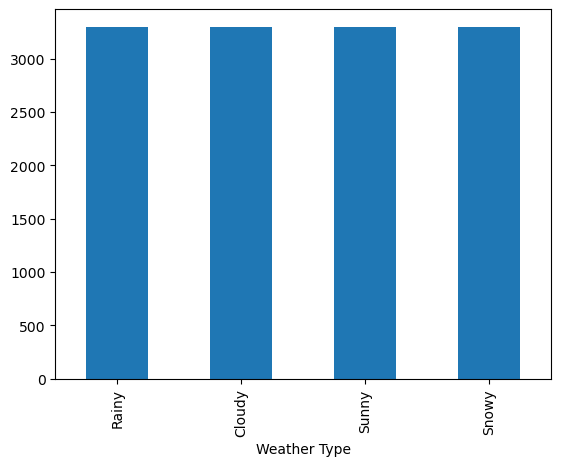

In [53]:
# визуальный анализ распределения типа погоды
df['Weather Type'].value_counts(normalize=False).plot.bar()

Наблюдается равномерное распределение целевой переменной

<Axes: ylabel='proportion'>

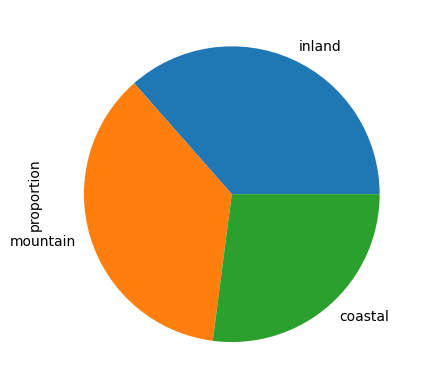

In [56]:
# распределение локации
df['Location'].value_counts(normalize=True).plot.pie()

Наблюдается практически равномерное распределение локации

In [59]:
# количество уникальных сезонов
df['Season'].nunique()

4

<Axes: ylabel='Season'>

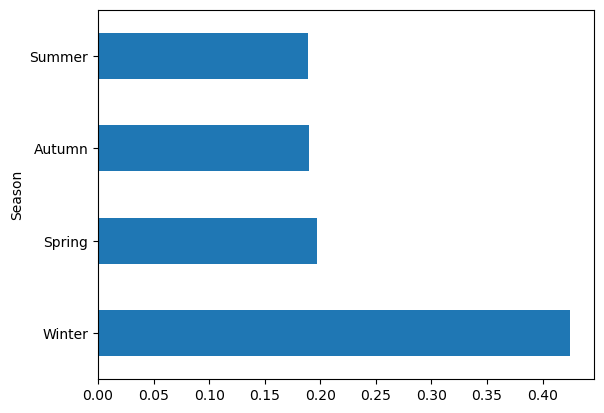

In [61]:
# распределение сезонов
df['Season'].value_counts(normalize=True,).plot.barh()

Наблюдается большее количество записей зимой, чем в другие времена года

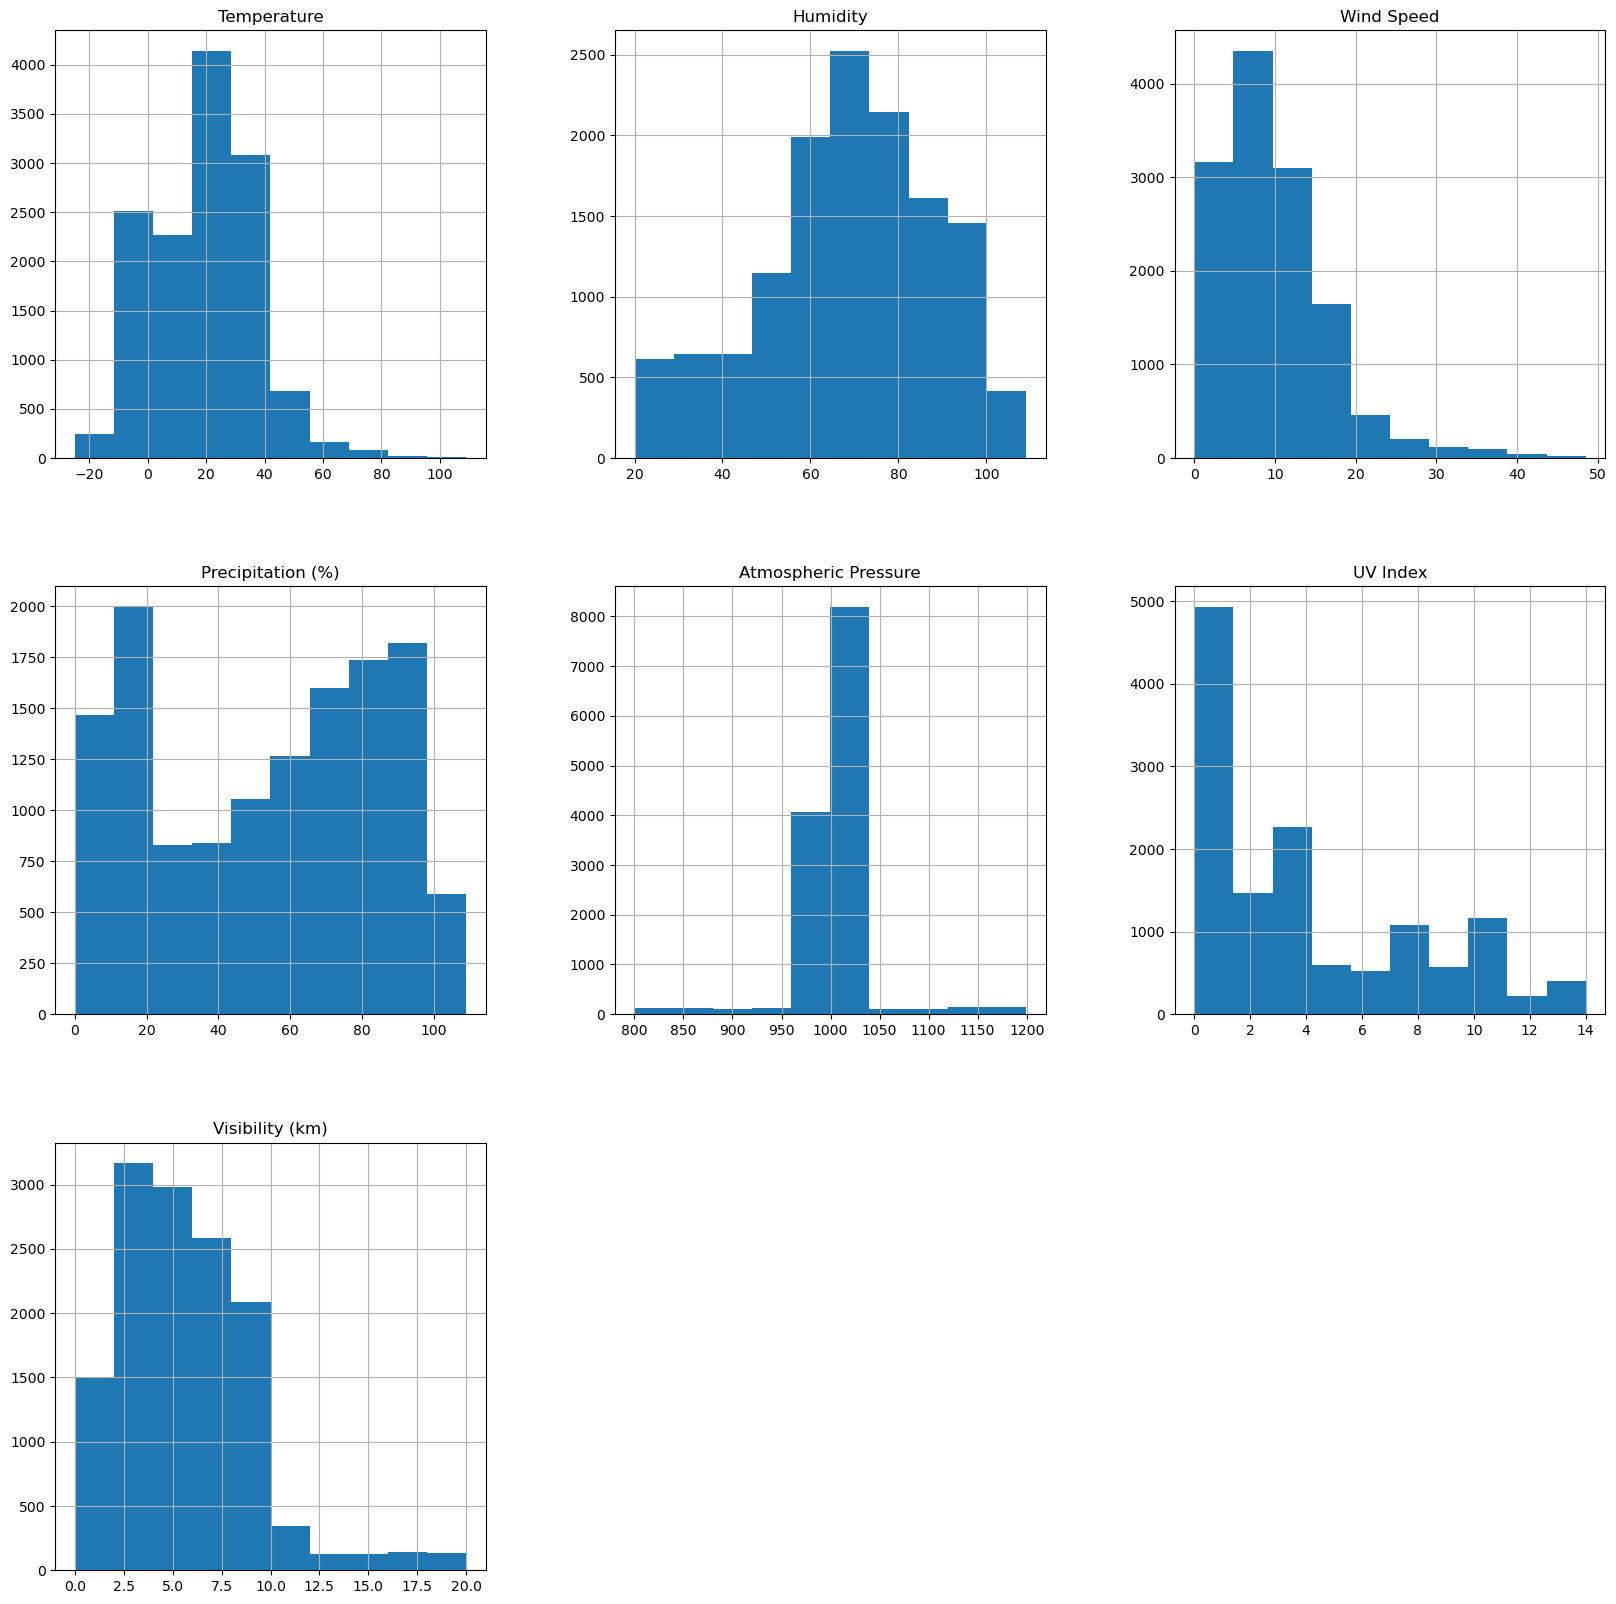

In [64]:
# гистаграммы всех признаков
df.hist(figsize=(20,20));

На гистограммах наблюдается практически равномерное распределение данных

<Axes: >

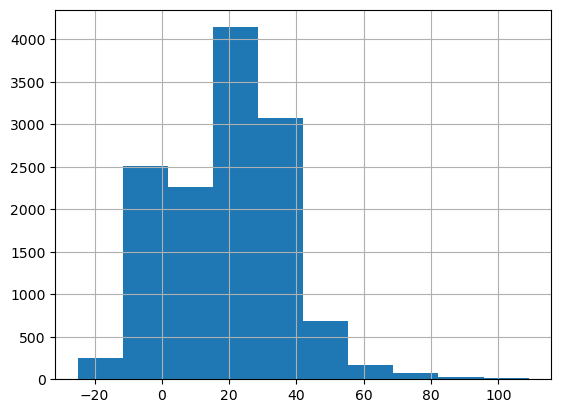

In [66]:
df['Temperature'].hist()

Гистаграмма показывает распределение тембературы.
Есть множество выбросов значений признака

<Axes: >

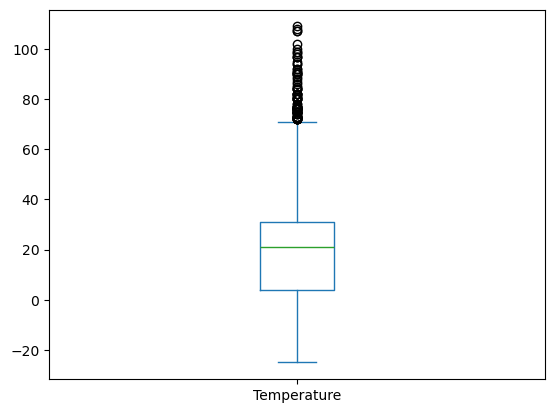

In [70]:
# "ящик с усами" (boxplot) для визуализации распределения вероятностей значений признака
df['Temperature'].plot.box()

На графике всё также виднеется множество аномальных значений(выбросов)

<Axes: ylabel='Density'>

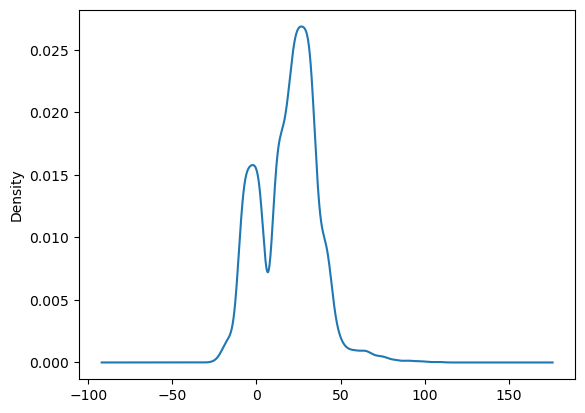

In [73]:
# график плотности распределения признака
df['Temperature'].plot.density()

<Axes: ylabel='Temperature'>

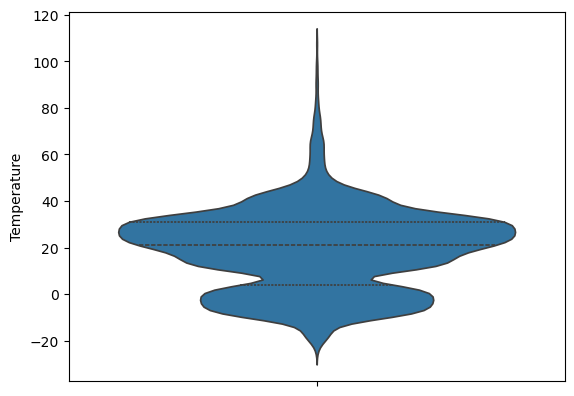

In [75]:
# скрипичная диаграмма
sns.violinplot(y=df["Temperature"], inner="quartile")

#### Промежуточный вывод
Проделав визуальный анализ можно сделать промежуточный вывод.

В датафрейме сбалансированное распеределение данных в признаках. Есть не большие выбросы в признаках: Temperature, Humidity, Precipitation (%) и UV Index

### Двумерный анализ признаков

In [79]:
df.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

Заменяем категориальные значения на численные

In [82]:
# замены категориальных значений на численные
df['Season'] = df['Season'].map({'Winter':0, 'Spring':1, 'Summer':2, 'Autumn':3})

df['Location'] = df['Location'].map({'inland':0, 'mountain':1, 'coastal':2})

df['Cloud Cover'] = df['Cloud Cover'].map({'partly cloudy':0, 'clear':1, 'overcast':2, 'cloudy':3})

df['Weather Type'] = df['Weather Type'].map({'Rainy':0, 'Cloudy':1, 'Sunny':2, 'Snowy':3})

In [84]:
# список признаков для анализа
two_analisis = ['Temperature', 'Humidity', 'Wind Speed', 'Cloud Cover', 'Precipitation (%)', 'Atmospheric Pressure', 
                'UV Index', 'Season','Visibility (km)', 'Location', 'Weather Type']

Строим матрицу корреляций и тепловую карту

In [87]:
# матрица корреляций

corr = df[two_analisis].corr()
corr

Temperature  Humidity  Wind Speed  Cloud Cover  \
Temperature              1.000000 -0.207969   -0.070022    -0.255247   
Humidity                -0.207969  1.000000    0.406079     0.145574   
Wind Speed              -0.070022  0.406079    1.000000     0.101455   
Cloud Cover             -0.255247  0.145574    0.101455     1.000000   
Precipitation (%)       -0.287206  0.638631    0.443770     0.257138   
Atmospheric Pressure     0.209188 -0.120653   -0.077757    -0.113061   
UV Index                 0.374773 -0.342694   -0.068147    -0.143955   
Season                   0.379476 -0.181043   -0.047660    -0.131479   
Visibility (km)          0.250751 -0.479969   -0.311828    -0.151395   
Location                 0.189524 -0.092175   -0.031476    -0.053803   
Weather Type            -0.407396 -0.081860   -0.172076     0.056223   

                      Precipitation (%)  Atmospheric Pressure  UV Index  \
Temperature                   -0.287206              0.209188  0.374773   
Humidity                       0.638631             -0.120653 -0.342694   
Wind Speed                     0.443770             -0.077757 -0.068147   
Cloud Cover                    0.257138             -0.113061 -0.143955   
Precipitation (%)              1.000000             -0.177444 -0.291601   
Atmospheric Pressure          -0.177444              1.000000  0.154128   
UV Index                      -0.291601              0.154128  1.000000   
Season                        -0.205374              0.121566  0.203622   
Visibility (km)               -0.457444              0.120182  0.362922   
Location                      -0.100080              0.062520  0.090593   
Weather Type                  -0.055412             -0.094754  0.058527   

                        Season  Visibility (km)  Location  Weather Type  
Temperature           0.379476         0.250751  0.189524     -0.407396  
Humidity             -0.181043        -0.479969 -0.092175     -0.081860  
Wind Speed           -0.047660        -0.311828 -0.031476     -0.172076  
Cloud Cover          -0.131479        -0.151395 -0.053803      0.056223  
Precipitation (%)    -0.205374        -0.457444 -0.100080     -0.055412  
Atmospheric Pressure  0.121566         0.120182  0.062520     -0.094754  
UV Index              0.203622         0.362922  0.090593      0.058527  
Season                1.000000         0.227055  0.155921     -0.382421  
Visibility (km)       0.227055         1.000000  0.104598      0.012547  
Location              0.155921         0.104598  1.000000     -0.202935  
Weather Type         -0.382421         0.012547 -0.202935      1.000000

<Axes: >

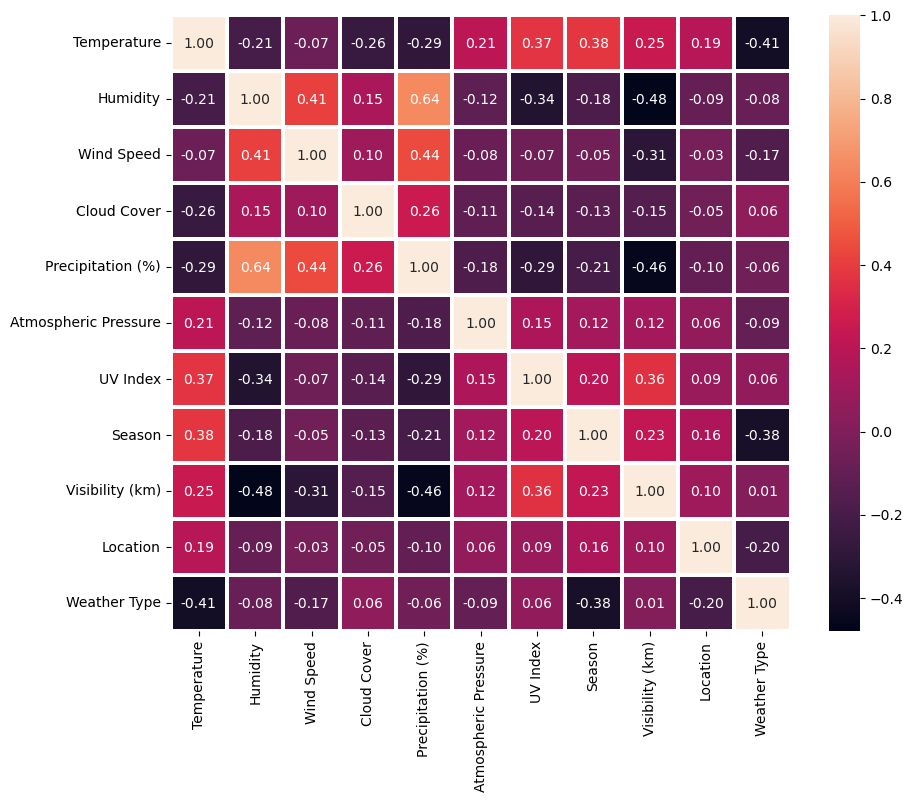

In [89]:
# тепловая карта корреляций между признаками

f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)

#### Промежуточный вывод
Построив тепловую карту корреляций можно сделать промежуточный вывод.

На карте виднеется зависимость между двумя признаками: Humidity и Precipitation (%). Также есть не большая зависимость между Precipitation (%) и Wind Speed, Wind Speed и Humidity.

Между целевым признаком Weather Type и другими признаками особых зависимостей не наблюдается.




График зависимостей Temperature и Wind Speed

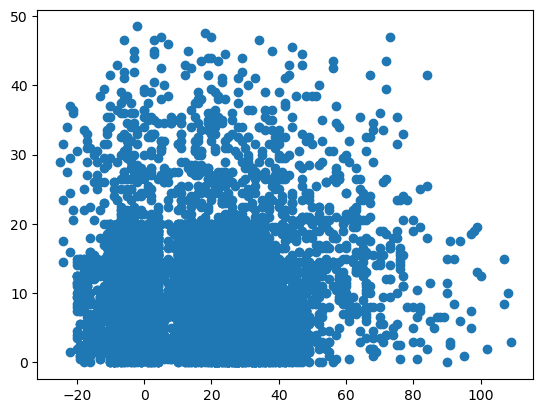

In [94]:
# диаграмма рассеяния для 2х признаков
plt.scatter(df['Temperature'], df['Wind Speed'])

График зависимостей Temperature и Wind Speed средствами библиотеки seaborn 

<Axes: xlabel='Temperature', ylabel='Wind Speed'>

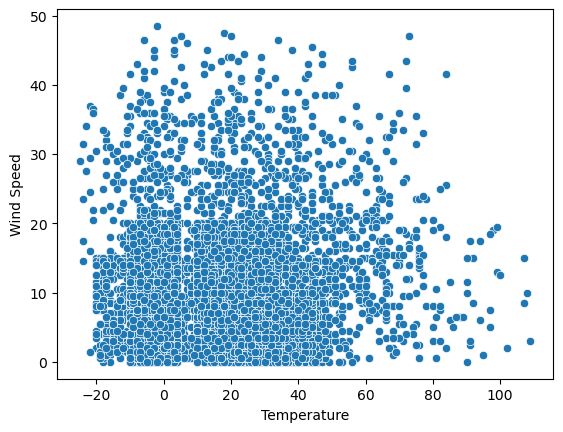

In [97]:
# диаграмма рассеяния для 2х признаков средствами библиотеки seaborn 
sns.scatterplot(data=df, x="Temperature", y="Wind Speed")

График того, как температура и скорость ветра влияют на тип погоды

<Axes: xlabel='Temperature', ylabel='Wind Speed'>

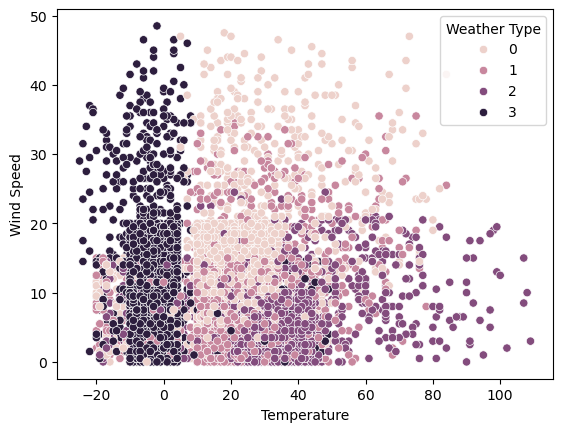

In [100]:
# температура и скорость ветра влияют на тип погоды
sns.scatterplot(data=df, x="Temperature", y="Wind Speed", hue="Weather Type")

Как температура и влажность влияет на тип погоды

<Axes: xlabel='Temperature', ylabel='Humidity'>

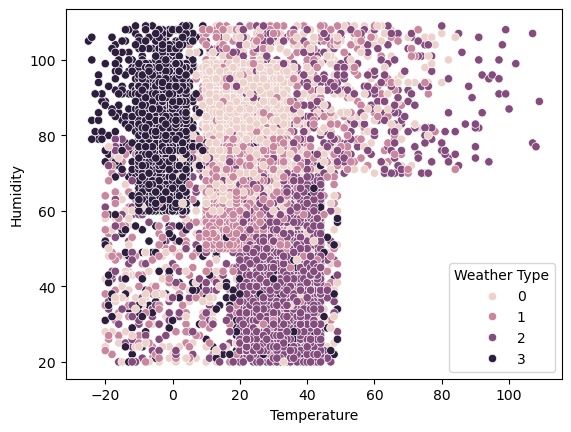

In [103]:
# как температура и влажность влияет на тип погоды
sns.scatterplot(data=df, x="Temperature", y="Humidity", hue="Weather Type")

График показывает как локация и атмосферное давление влияет на тип погоды

<Axes: xlabel='Location', ylabel='Atmospheric Pressure'>

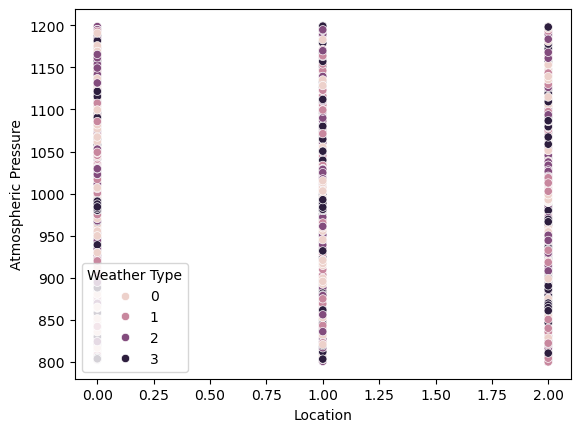

In [91]:
# локация и атмосферное давление влияет на тип погоды
sns.scatterplot(data=df, x="Location", y="Atmospheric Pressure", hue="Weather Type")

График показывает как локация и атмосферное давление влияет на тип погоды

<Axes: xlabel='Location', ylabel='Atmospheric Pressure'>

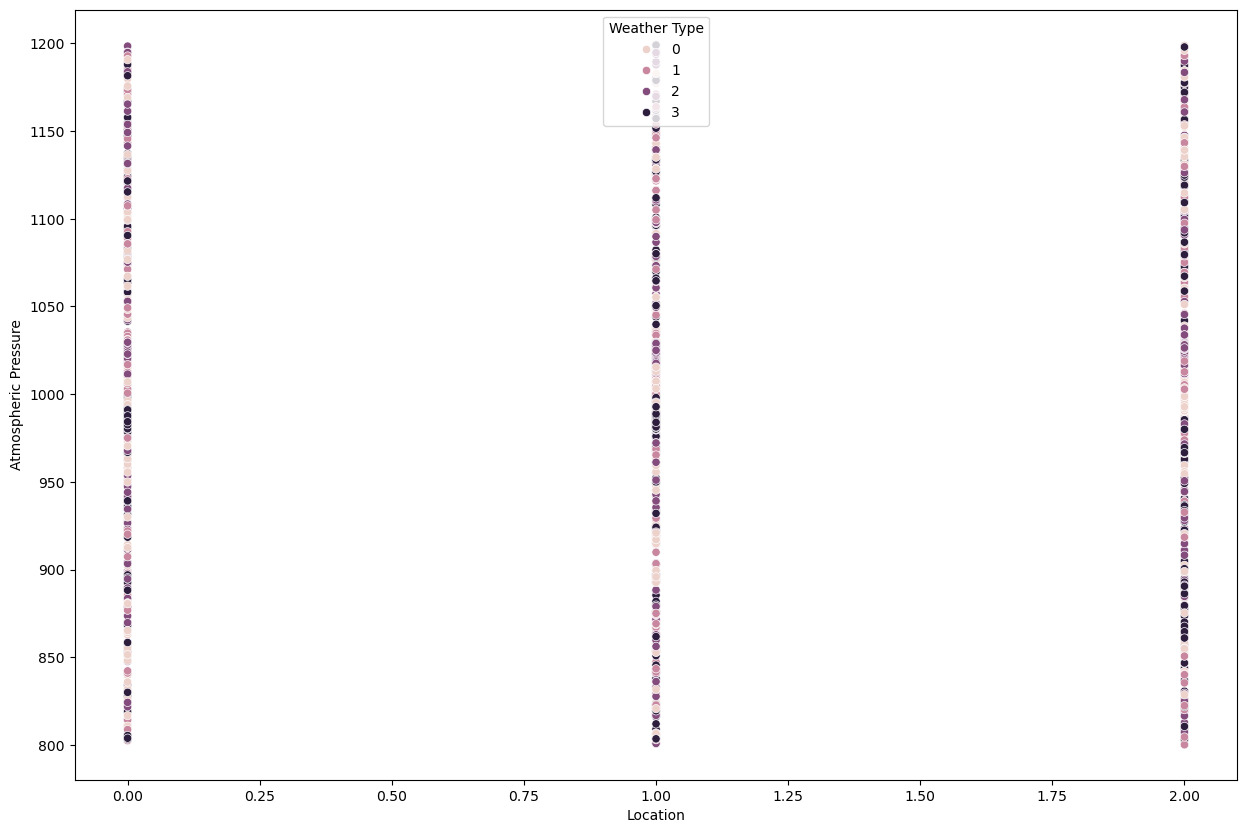

In [95]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x="Location", y="Atmospheric Pressure", hue="Weather Type")

Гистограмма зависимостей между признаками

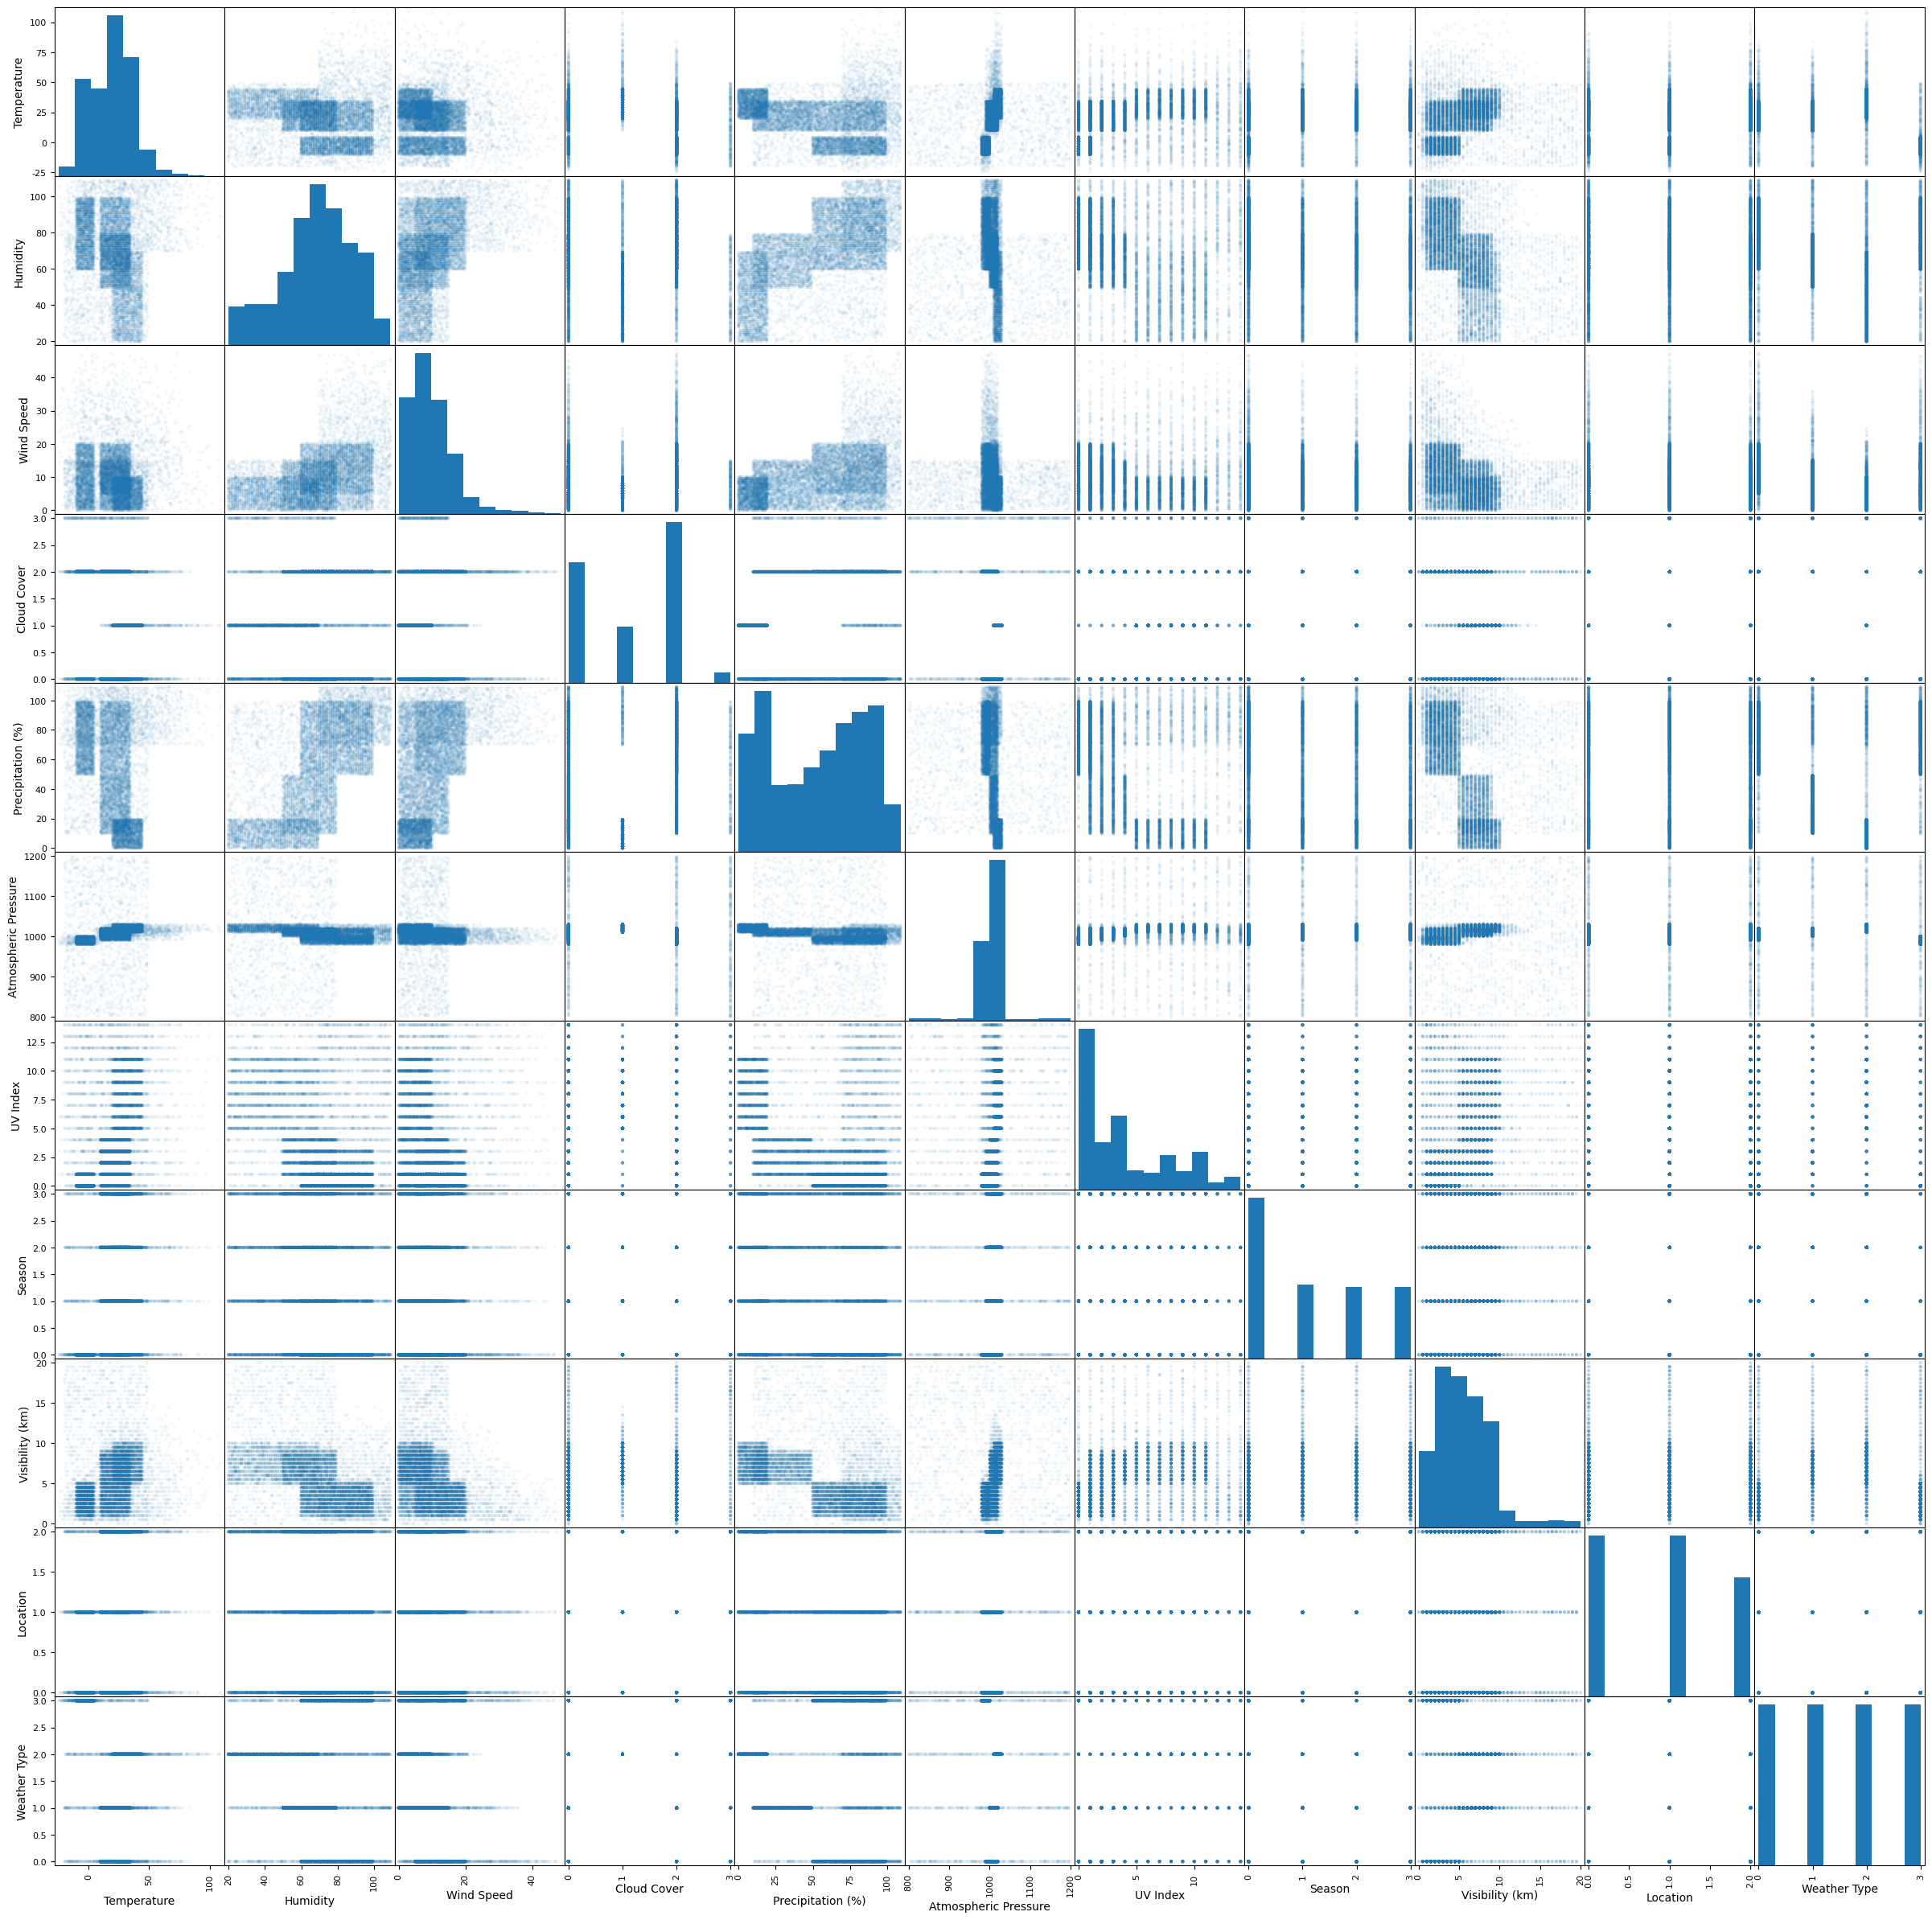

In [96]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[two_analisis], alpha=0.05, figsize=(30, 30));

Гистограмма зависимостей между признаками библиотеки pairplot

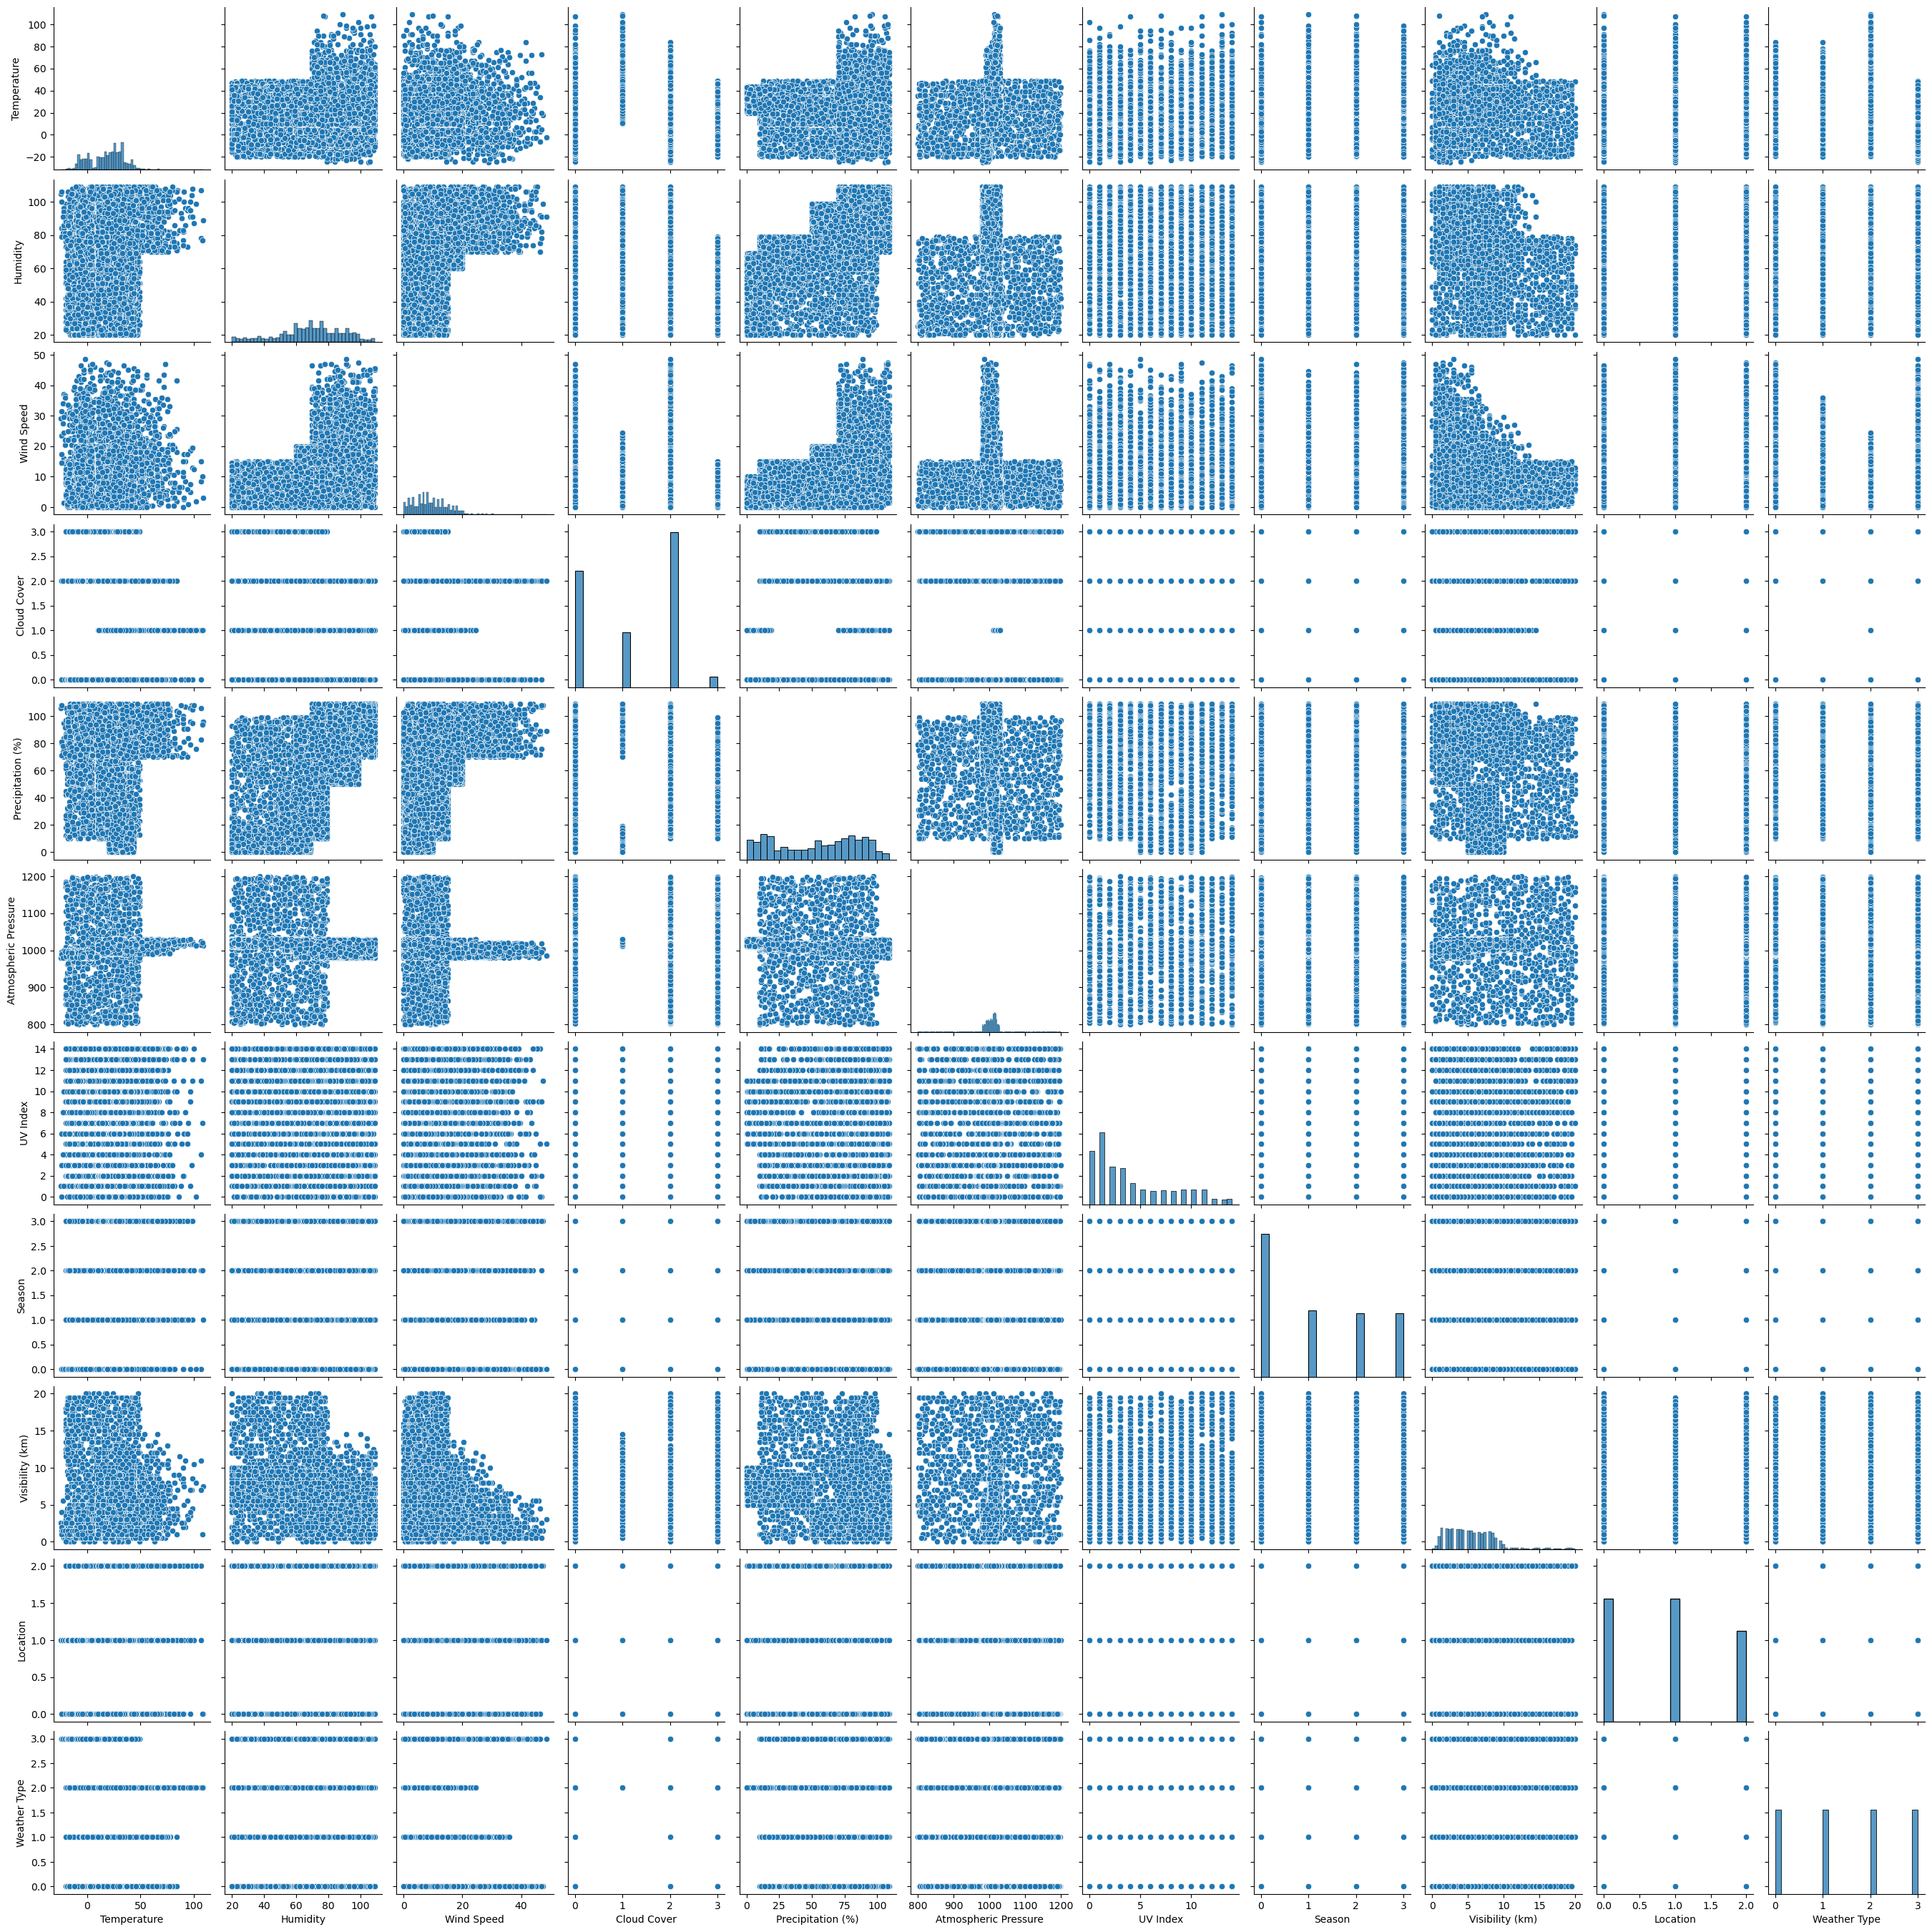

In [97]:
sns.pairplot(df[two_analisis])

График показывает относительное распределение влажности и количества осадков

[Text(1, 0, 'Humidity'), Text(2, 0, 'Precipitation (%)')]

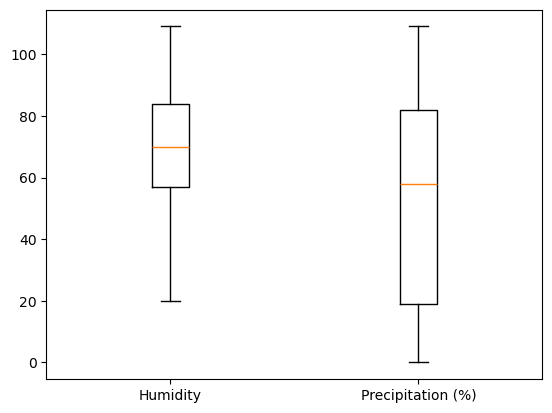

In [98]:
# два бокс-плота на одном графике - построение с помощью matplotlib
my_dict = {'Humidity': df['Humidity'], 'Precipitation (%)': df['Precipitation (%)']}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

График показывает распределения типа погоды: влажность относительно локации

<Axes: xlabel='Location', ylabel='Humidity'>

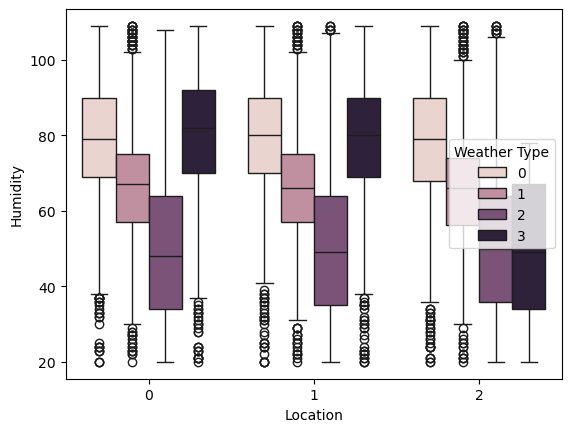

In [103]:
sns.boxplot(data=df, y="Humidity", x="Location", hue="Weather Type")

График зависимости влажности от времени года

<Axes: xlabel='Season', ylabel='Humidity'>

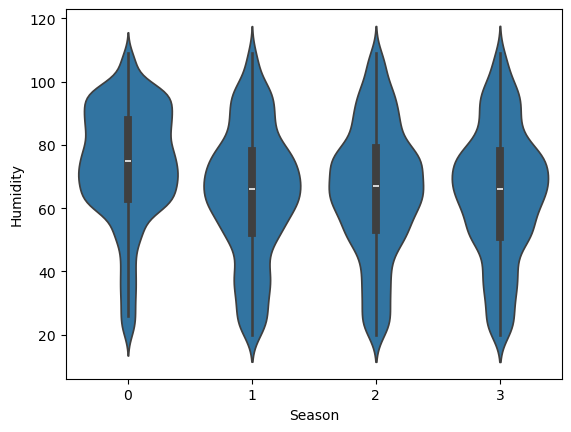

In [104]:
sns.violinplot(data=df, y="Humidity", x="Season")

### Многомерный анализ признаков

In [108]:
df.head()

Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0         14.0        73         9.5               82.0            0   
1         39.0        96         8.5               71.0            0   
2         30.0        64         7.0               16.0            1   
3         38.0        83         1.5               82.0            1   
4         27.0        74        17.0               66.0            2   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2       0              3.5         0   
1               1011.43         7       1             10.0         0   
2               1018.72         5       1              5.5         1   
3               1026.25         7       1              1.0         2   
4                990.67         1       0              2.5         1   

   Weather Type  
0             0  
1             1  
2             2  
3             2  
4             0

In [110]:
res = pd.pivot_table(data=df, index='Weather Type', columns='Season', values='Wind Speed')
res

Season                0          1          2          3
Weather Type                                            
0             13.494725  13.358604  13.797561  14.082915
1              8.539294   8.438824   8.776110   8.676179
2              5.915511   5.789725   6.328181   6.251508
3             11.186649   8.143750   8.484615   7.195652

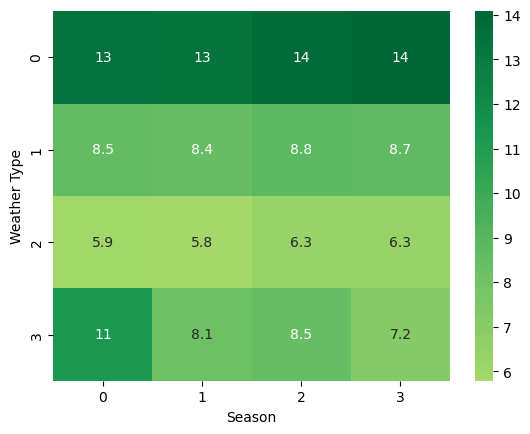

In [112]:
sns.heatmap(res, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

#### Промежуточный вывод
Построив тепловую карту зависимостей(Wind Speed от Weather Type и Season) можно сделать промежуточный вывод.

На карте виднеется зависимость скорости ветра от типа погоды. При дождливой погоде скорость ветра значительно выше. Также скорость ветра возростает при снегопаде зимой. 

При солнечной погоде или облачности, скорость ветра значительно ниже чем в дождь или снегопад. 

## Предварительная обработка данных (preprocessing)

### Преобразование типов

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  int64  
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  int64  
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  int64  
 10  Weather Type          13200 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.1 MB


In [116]:
df.head(10)

Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0         14.0        73         9.5               82.0            0   
1         39.0        96         8.5               71.0            0   
2         30.0        64         7.0               16.0            1   
3         38.0        83         1.5               82.0            1   
4         27.0        74        17.0               66.0            2   
5         32.0        55         3.5               26.0            2   
6         -2.0        97         8.0               86.0            2   
7          3.0        85         6.0               96.0            0   
8          3.0        83         6.0               66.0            2   
9         28.0        74         8.5              107.0            1   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2       0              3.5         0   
1               1011.43         7       1             10.0         0   
2               1018.72         5       1              5.5         1   
3               1026.25         7       1              1.0         2   
4                990.67         1       0              2.5         1   
5               1010.03         2       2              5.0         0   
6                990.87         1       0              4.0         0   
7                984.46         1       0              3.5         0   
8                999.44         0       0              1.0         1   
9               1012.13         8       0              7.5         2   

   Weather Type  
0             0  
1             1  
2             2  
3             2  
4             0  
5             1  
6             3  
7             3  
8             3  
9             2

### Выявление выбросов

In [121]:
out_columns = ['Temperature', 'Humidity', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index']

In [123]:
df[out_columns].describe()

Temperature      Humidity  Precipitation (%)  Atmospheric Pressure  \
count  13200.000000  13200.000000       13200.000000          13200.000000   
mean      19.127576     68.710833          53.644394           1005.827896   
std       17.386327     20.194248          31.946541             37.199589   
min      -25.000000     20.000000           0.000000            800.120000   
25%        4.000000     57.000000          19.000000            994.800000   
50%       21.000000     70.000000          58.000000           1007.650000   
75%       31.000000     84.000000          82.000000           1016.772500   
max      109.000000    109.000000         109.000000           1199.210000   

           UV Index  
count  13200.000000  
mean       4.005758  
std        3.856600  
min        0.000000  
25%        1.000000  
50%        3.000000  
75%        7.000000  
max       14.000000

#### Вывод
В датафрейме наблюдаются выбросы в нескольких параметрах - Temperature, Humidity, Atmospheric Pressure, UV Index


### Обработка выбросов

##### количество выбросов температуры

In [128]:
df[df["Temperature"] > 75]

Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
210           78.0        81         8.0               78.0            2   
535           80.0        76         3.0               93.0            1   
730           76.0        91        13.5               82.0            0   
881           91.0       106         2.5               92.0            0   
886           82.0        74        19.5               81.0            0   
...            ...       ...         ...                ...          ...   
12410         77.0       106        33.0               95.0            2   
12752         90.0        83        15.0               98.0            1   
12878         95.0        96         1.0               84.0            0   
13065         97.0        95         7.5               79.0            1   
13108         81.0        81        10.5               96.0            1   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
210                 1010.19         1       3              4.5         0   
535                 1014.26        13       0              3.0         0   
730                 1015.18         1       3              7.0         0   
881                 1022.18         6       0              5.0         1   
886                 1022.21        10       1              9.0         2   
...                     ...       ...     ...              ...       ...   
12410                992.06         9       0              2.5         2   
12752               1028.13         2       2             10.0         0   
12878               1027.98         7       1              3.0         1   
13065               1029.30         9       0              4.0         1   
13108               1022.66        11       2              3.5         0   

       Weather Type  
210               1  
535               2  
730               1  
881               2  
886               2  
...             ...  
12410             0  
12752             2  
12878             2  
13065             2  
13108             2  

[66 rows x 11 columns]

In [130]:
def temp(tm):
    if tm > 75:
        return 19
    else:
        return tm

In [132]:
# заменим выбросы средним значением
df['Temperature'] = df['Temperature'].apply(temp)
max(df['Temperature'])

75.0

##### количество выбросов влажности воздуха

In [135]:
df[df["Humidity"] > 100]

Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
19            13.0       102        12.0               72.0            1   
37             2.0       105        19.0              109.0            2   
155           15.0       105         7.5               75.0            2   
239           29.0       107         0.5               93.0            0   
247           28.0       108         7.5               83.0            0   
...            ...       ...         ...                ...          ...   
13050        -15.0       105         3.0              103.0            2   
13066          5.0       102        31.0              108.0            0   
13113         42.0       106        32.5              103.0            0   
13124         46.0       101        16.0               80.0            0   
13185         37.0       106        23.5              104.0            0   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
19                  1012.25         4       2              8.0         0   
37                   991.68         7       0              3.5         1   
155                 1006.45        10       2              4.0         0   
239                 1002.18         8       1             10.0         2   
247                 1018.84         1       2              4.0         0   
...                     ...       ...     ...              ...       ...   
13050                993.75         8       0              2.5         0   
13066               1005.89        10       2              2.0         0   
13113                996.45        14       1              1.0         1   
13124               1015.06        11       3              1.5         0   
13185                998.71        14       2              3.0         2   

       Weather Type  
19                2  
37                3  
155               1  
239               1  
247               2  
...             ...  
13050             3  
13066             0  
13113             0  
13124             0  
13185             0  

[416 rows x 11 columns]

In [137]:
def humidity(hum):
    if hum > 100:
        return 68
    else:
        return hum

In [139]:
# заменем значения > 100 на среднее значение
df['Humidity'] = df['Humidity'].apply(humidity)
max(df['Humidity'])

100

##### количество выбросов атмосферного давления

In [142]:
df[df['Atmospheric Pressure'] > 1100]

Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
38            -9.0        49         1.5               58.0            0   
85            32.0        35         2.5               63.0            0   
206           49.0        64         4.0               61.0            3   
207           28.0        77         4.5               68.0            0   
244           28.0        47        11.5               24.0            0   
...            ...       ...         ...                ...          ...   
12939         14.0        76         7.0               25.0            2   
12965         12.0        30        14.0               68.0            3   
13013         34.0        28        14.5               97.0            2   
13163          5.0        67         9.5               71.0            0   
13184          3.0        62         7.5               14.0            2   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
38                  1132.20         8       1             16.5         1   
85                  1160.48         2       0              0.0         2   
206                 1130.72        14       0              0.0         2   
207                 1175.60        14       3              0.0         2   
244                 1105.69         9       3              1.5         0   
...                     ...       ...     ...              ...       ...   
12939               1131.48         7       2              8.0         0   
12965               1165.34         9       2             19.0         0   
13013               1183.44        14       3             18.5         2   
13163               1122.86         4       1             15.0         1   
13184               1128.35         3       2              7.5         1   

       Weather Type  
38                3  
85                2  
206               1  
207               3  
244               2  
...             ...  
12939             2  
12965             2  
13013             2  
13163             1  
13184             0  

[311 rows x 11 columns]

In [144]:
def atmpr(atm):
    if atm >= 1100:
        return 1005
    else:
        return atm

In [146]:
# заменем значения > 1100 на среднее значение(1005)
df['Atmospheric Pressure'] = df['Atmospheric Pressure'].apply(atmpr)
max(df['Atmospheric Pressure'])

1099.65

##### количество выбросов осадков %

In [149]:
df[df["Precipitation (%)"] > 100]

Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
9             28.0        74         8.5              107.0            1   
24            38.0        83         7.0              101.0            0   
37             2.0        68        19.0              109.0            2   
56            41.0        85         9.0              101.0            2   
178           41.0        90        21.5              103.0            2   
...            ...       ...         ...                ...          ...   
13089         33.0        99        12.0              105.0            1   
13090          9.0        76         1.0              102.0            2   
13113         42.0        68        32.5              103.0            0   
13136         56.0        74         0.0              103.0            0   
13185         37.0        68        23.5              104.0            0   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
9                   1012.13         8       0              7.5         2   
24                  1017.94         4       1              8.5         1   
37                   991.68         7       0              3.5         1   
56                  1017.89         3       2              7.5         1   
178                 1002.15        13       0              4.0         2   
...                     ...       ...     ...              ...       ...   
13089               1028.08        12       1              6.0         0   
13090                982.64        13       0              0.5         0   
13113                996.45        14       1              1.0         1   
13136               1012.40        10       2              5.5         0   
13185                998.71        14       2              3.0         2   

       Weather Type  
9                 2  
24                1  
37                3  
56                1  
178               0  
...             ...  
13089             2  
13090             3  
13113             0  
13136             1  
13185             0  

[392 rows x 11 columns]

In [151]:
def precip(prc):
    if prc >= 100:
        return 100
    else:
        return prc

In [153]:
# заменем значения > 100 на 100
df['Precipitation (%)'] = df['Precipitation (%)'].apply(precip)
max(df['Precipitation (%)'])

100.0

##### количество выбросов уф - индекса

In [156]:
df[df["UV Index"] == 14]

Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
93            14.0        44         9.0               11.0            0   
134           29.0        77         0.5               91.0            3   
206           49.0        64         4.0               61.0            3   
207           28.0        77         4.5               68.0            0   
221           63.0        86        13.0               75.0            1   
...            ...       ...         ...                ...          ...   
12991         17.0        95         6.5              100.0            1   
12999         -2.0        90        28.5               84.0            2   
13013         34.0        28        14.5               97.0            2   
13113         42.0        68        32.5              100.0            0   
13185         37.0        68        23.5              100.0            0   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
93                   853.01        14       0              3.5         2   
134                  934.49        14       3             17.0         0   
206                 1005.00        14       0              0.0         2   
207                 1005.00        14       3              0.0         2   
221                 1027.31        14       2              2.5         2   
...                     ...       ...     ...              ...       ...   
12991               1028.12        14       2              8.5         1   
12999                992.14        14       0              4.5         1   
13013               1005.00        14       3             18.5         2   
13113                996.45        14       1              1.0         1   
13185                998.71        14       2              3.0         2   

       Weather Type  
93                0  
134               2  
206               1  
207               3  
221               2  
...             ...  
12991             2  
12999             3  
13013             2  
13113             0  
13185             0  

[210 rows x 11 columns]

In [158]:
def uv_index(uv):
    if uv >= 14:
        return 4
    else:
        return uv

In [160]:
# заменяем выбросы на среднее значение

In [162]:
df['UV Index'] = df['UV Index'].apply(uv_index)
max(df['UV Index'])

13

##### Проверка, после обработки выбросов

In [165]:
# проверка
new_out_columns = ['Temperature', 'Humidity', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index']
df[new_out_columns].describe()

Temperature      Humidity  Precipitation (%)  Atmospheric Pressure  \
count  13200.000000  13200.000000       13200.000000          13200.000000   
mean      18.791970     67.539394          53.496212           1002.358336   
std       16.712257     19.088272          31.715382             29.135643   
min      -25.000000     20.000000           0.000000            800.120000   
25%        4.000000     57.000000          19.000000            994.800000   
50%       21.000000     69.000000          58.000000           1006.495000   
75%       30.000000     81.000000          82.000000           1016.020000   
max       75.000000    100.000000         100.000000           1099.650000   

           UV Index  
count  13200.000000  
mean       3.846667  
std        3.641271  
min        0.000000  
25%        1.000000  
50%        3.000000  
75%        6.000000  
max       13.000000

In [167]:
df.shape

(13200, 11)

### Формирование дата-сета для обучения моделей

In [179]:
# список имён признаков, которые будут использоваться для построения модели
features_names = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Cloud Cover', 
                  'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility (km)', 'Location']

In [181]:
# объединение изначальных признаков и фиктивных бинарных признаков - формирование матрицы Объекты-признаки
X = pd.concat([df[features_names]], axis  = 1)
X.shape

(13200, 10)

In [183]:
X.head()

Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0         14.0        73         9.5               82.0            0   
1         39.0        96         8.5               71.0            0   
2         30.0        64         7.0               16.0            1   
3         38.0        83         1.5               82.0            1   
4         27.0        74        17.0               66.0            2   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  
0               1010.82         2       0              3.5         0  
1               1011.43         7       1             10.0         0  
2               1018.72         5       1              5.5         1  
3               1026.25         7       1              1.0         2  
4                990.67         1       0              2.5         1

In [185]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df['Weather Type']

In [187]:
df['Weather Type'].value_counts()

Weather Type
0    3300
1    3300
2    3300
3    3300
Name: count, dtype: int64

### Моделирование

In [190]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [191]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8844, 10) (4356, 10) (8844,) (4356,)


In [225]:
from sklearn.metrics import accuracy_score

In [227]:
from sklearn.metrics import classification_report

### KNeighborsClassifier (Классификация ближайших соседей)

In [229]:
from sklearn.neighbors import KNeighborsClassifier

In [231]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 62.5 ms
Wall time: 36.8 ms


KNeighborsClassifier()

In [233]:
knn.predict(X_test[:20])

array([2, 2, 2, 3, 2, 3, 0, 0, 1, 3, 3, 3, 3, 2, 2, 2, 0, 2, 2, 1],
      dtype=int64)

In [235]:
knn_pred_test = knn.predict(X_test)
display(knn_pred_test[:20], np.array(y_test[:20]))

array([2, 2, 2, 3, 2, 3, 0, 0, 1, 3, 3, 3, 3, 2, 2, 2, 0, 2, 2, 1],
      dtype=int64)

array([2, 2, 2, 3, 2, 3, 2, 0, 2, 3, 3, 3, 3, 2, 2, 2, 0, 2, 2, 1],
      dtype=int64)

In [237]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.9200587969244686
test accuracy:  0.8831496786042241


In [238]:
knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)

In [239]:
# KNeighborsClassifier
print(classification_report(knn_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.90      0.83      0.87      1166
           1       0.83      0.85      0.84      1031
           2       0.86      0.91      0.89      1038
           3       0.94      0.94      0.94      1121

    accuracy                           0.88      4356
   macro avg       0.88      0.88      0.88      4356
weighted avg       0.88      0.88      0.88      4356



#### Матрица ошибок KNeighborsClassifier

In [244]:
y_train_predict_knn = knn.predict(X_train)
y_test_predict_knn = knn.predict(X_test)

In [245]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [246]:
cm1 = confusion_matrix(y_test, y_test_predict_knn)
cm1

array([[ 972,   66,   26,   14],
       [ 104,  875,   46,   29],
       [  64,   64,  947,   25],
       [  26,   26,   19, 1053]], dtype=int64)

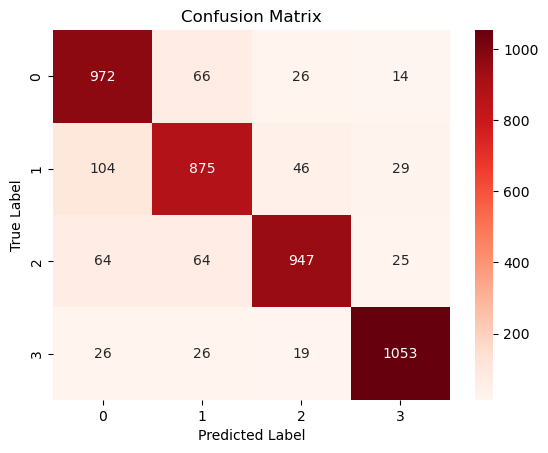

In [247]:
sns.heatmap(cm1, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [254]:
from sklearn.naive_bayes import GaussianNB

In [256]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: total: 15.6 ms
Wall time: 11.2 ms


GaussianNB()

In [258]:
gnb_pred_test = gnb.predict(X_test)
display(gnb_pred_test[:20], np.array(y_test[:20]))

array([2, 0, 2, 3, 2, 3, 0, 0, 2, 3, 3, 3, 3, 2, 2, 2, 0, 2, 2, 1],
      dtype=int64)

array([2, 2, 2, 3, 2, 3, 2, 0, 2, 3, 3, 3, 3, 2, 2, 2, 0, 2, 2, 1],
      dtype=int64)

In [262]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, gnb_pred_test)

0.8528466483011937

In [264]:
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)

In [266]:
print(classification_report(gnb_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1147
           1       0.80      0.88      0.83       957
           2       0.84      0.84      0.84      1095
           3       0.93      0.90      0.91      1157

    accuracy                           0.85      4356
   macro avg       0.85      0.85      0.85      4356
weighted avg       0.85      0.85      0.85      4356



#### Матрица ошибок Gaussian Naive Bayes

In [269]:
y_train_predict_gnb = gnb.predict(X_train)
y_test_predict_gnb = gnb.predict(X_test)

In [271]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [273]:
cm2 = confusion_matrix(y_test, y_test_predict_gnb)
cm2

array([[ 910,   48,   43,   77],
       [ 119,  838,   77,   20],
       [ 108,   49,  925,   18],
       [  10,   22,   50, 1042]], dtype=int64)

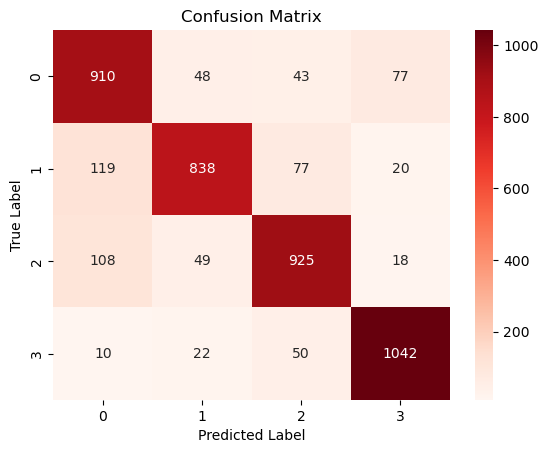

In [275]:
sns.heatmap(cm2, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Random Forest Classifier (Классификатор дерева решений)

In [278]:
from sklearn.ensemble import RandomForestClassifier

In [280]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

CPU times: total: 1.84 s
Wall time: 638 ms


In [281]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

array([2, 2, 2, 3, 2, 3, 0, 0, 1, 3, 3, 3, 3, 2, 2, 2, 0, 2, 2, 1],
      dtype=int64)

array([2, 2, 2, 3, 2, 3, 2, 0, 2, 3, 3, 3, 3, 2, 2, 2, 0, 2, 2, 1],
      dtype=int64)

In [284]:
from sklearn.metrics import accuracy_score

In [286]:
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)

In [288]:
print(classification_report(rfc_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1094
           1       0.90      0.86      0.88      1111
           2       0.89      0.95      0.92      1034
           3       0.94      0.94      0.94      1117

    accuracy                           0.91      4356
   macro avg       0.91      0.91      0.91      4356
weighted avg       0.91      0.91      0.91      4356



#### Матрица ошибок Random Forest Classifier

In [291]:
y_train_predict_rfc = rfc.predict(X_train)
y_test_predict_rfc = rfc.predict(X_test)

In [293]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [295]:
cm3 = confusion_matrix(y_test, y_test_predict_rfc)
cm3

array([[ 986,   62,   11,   19],
       [  60,  952,   26,   16],
       [  29,   58,  984,   29],
       [  19,   39,   13, 1053]], dtype=int64)

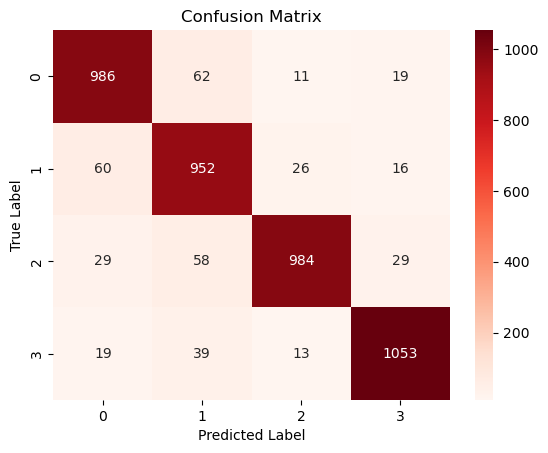

In [297]:
sns.heatmap(cm3, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Logistic Regression (Логистическая регрессия)

In [300]:
from sklearn.linear_model import LogisticRegression

In [302]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [304]:
%%time
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

CPU times: total: 281 ms
Wall time: 73.9 ms


LogisticRegression(random_state=42)

In [306]:
lr_pred_test = lr.predict(X_test)
display(lr_pred_test[:20], np.array(y_test[:20]))

array([2, 2, 2, 3, 2, 3, 1, 1, 2, 3, 3, 3, 3, 2, 2, 2, 0, 2, 2, 1],
      dtype=int64)

array([2, 2, 2, 3, 2, 3, 2, 0, 2, 3, 3, 3, 3, 2, 2, 2, 0, 2, 2, 1],
      dtype=int64)

In [308]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_pred_test)

0.8562901744719926

In [310]:
lr_accuracy = accuracy_score(y_test, lr_pred_test)

In [312]:
print(classification_report(lr_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1099
           1       0.81      0.84      0.83      1022
           2       0.82      0.87      0.84      1042
           3       0.94      0.88      0.91      1193

    accuracy                           0.86      4356
   macro avg       0.86      0.86      0.86      4356
weighted avg       0.86      0.86      0.86      4356



#### Матрица ошибок Logistic Regression

In [315]:
y_train_predict_lr = lr.predict(X_train)
y_test_predict_lr = lr.predict(X_test)

In [317]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [319]:
cm4 = confusion_matrix(y_test, y_test_predict_lr)
cm4

array([[ 917,   57,   35,   69],
       [  87,  857,   73,   37],
       [  82,   79,  904,   35],
       [  13,   29,   30, 1052]], dtype=int64)

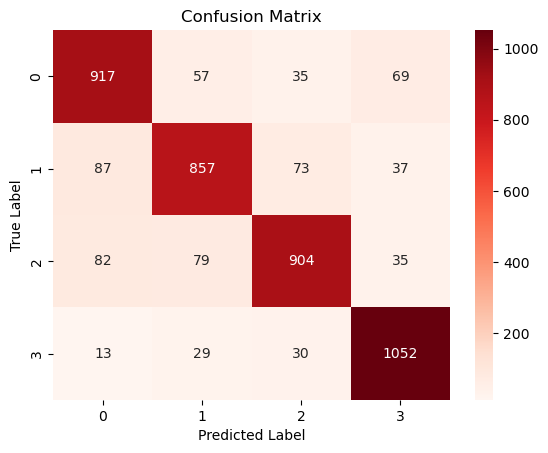

In [321]:
sns.heatmap(cm4, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Метрики классификации

In [339]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

In [349]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy", "Precision", "Recall", "F1-score"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]
log["Precision"] = [precision_score(y_test, knn_pred_test, average='macro'), precision_score(y_test, gnb_pred_test, average='macro'), precision_score(y_test, rfc_pred_test, average='macro'), precision_score(y_test, lr_pred_test, average='macro')]
log["Recall"] = [recall_score(y_test, knn_pred_test, average='macro'), recall_score(y_test, gnb_pred_test, average='macro'), recall_score(y_test, rfc_pred_test, average='macro'), recall_score(y_test, lr_pred_test, average='macro')]
log["F1-score"] = [f1_score(y_test, knn_pred_test, average='macro'), f1_score(y_test, gnb_pred_test, average='macro'), f1_score(y_test, rfc_pred_test, average='macro'), f1_score(y_test, lr_pred_test, average='macro')]
log = round(log, 4)

In [351]:
log

Classifier  Accuracy  Precision  Recall  F1-score
0      KNeighborsClassifier    0.8831     0.8835  0.8824    0.8824
1      Gaussian Naive Bayes    0.8528     0.8536  0.8518    0.8520
2  Random Forest Classifier    0.9125     0.9131  0.9123    0.9123
3       Logistic Regression    0.8563     0.8556  0.8554    0.8551

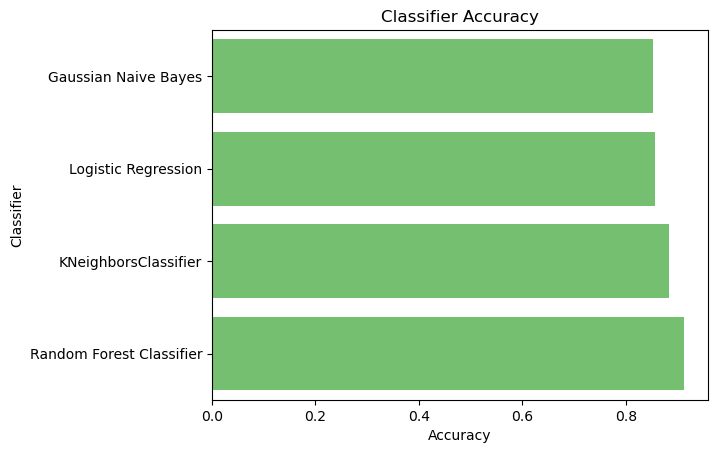

In [347]:
# посмотреть по большему колличеству параметров
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="g");

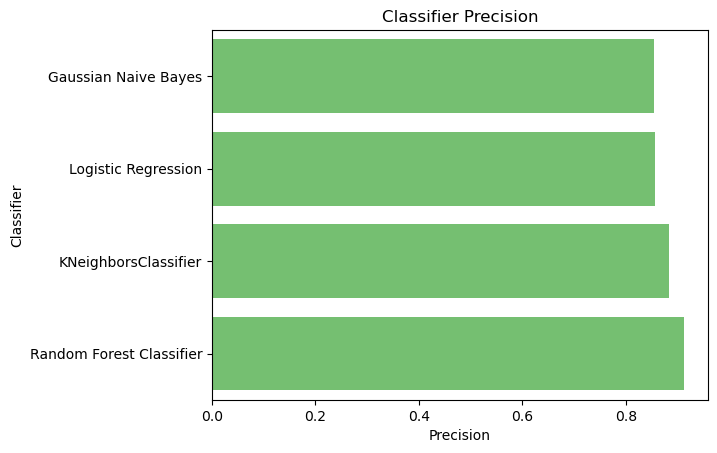

In [353]:
plt.xlabel('Precision')
plt.title('Classifier Precision')

sns.set_color_codes("muted")
sns.barplot(x='Precision', y='Classifier', data=log.sort_values(by='Precision'), color="g");

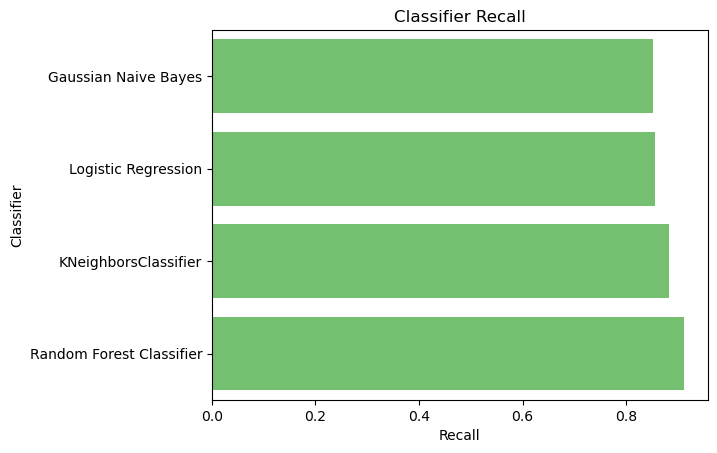

In [354]:
plt.xlabel('Recall')
plt.title('Classifier Recall')

sns.set_color_codes("muted")
sns.barplot(x='Recall', y='Classifier', data=log.sort_values(by='Recall'), color="g");

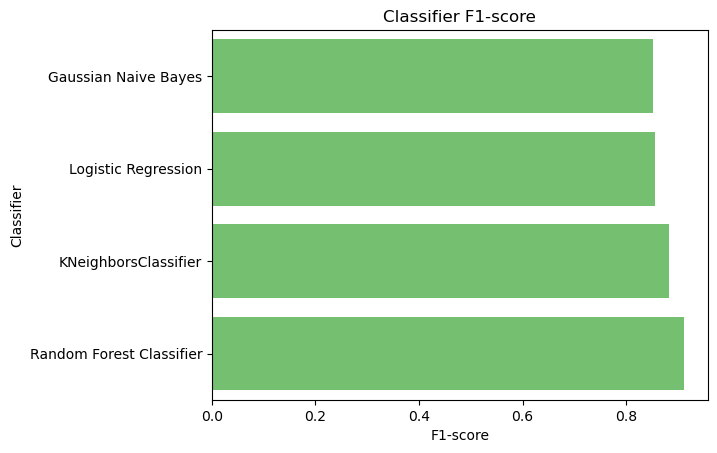

In [357]:
plt.xlabel('F1-score')
plt.title('Classifier F1-score')

sns.set_color_codes("muted")
sns.barplot(x='F1-score', y='Classifier', data=log.sort_values(by='F1-score'), color="g");

#### Общая таблица

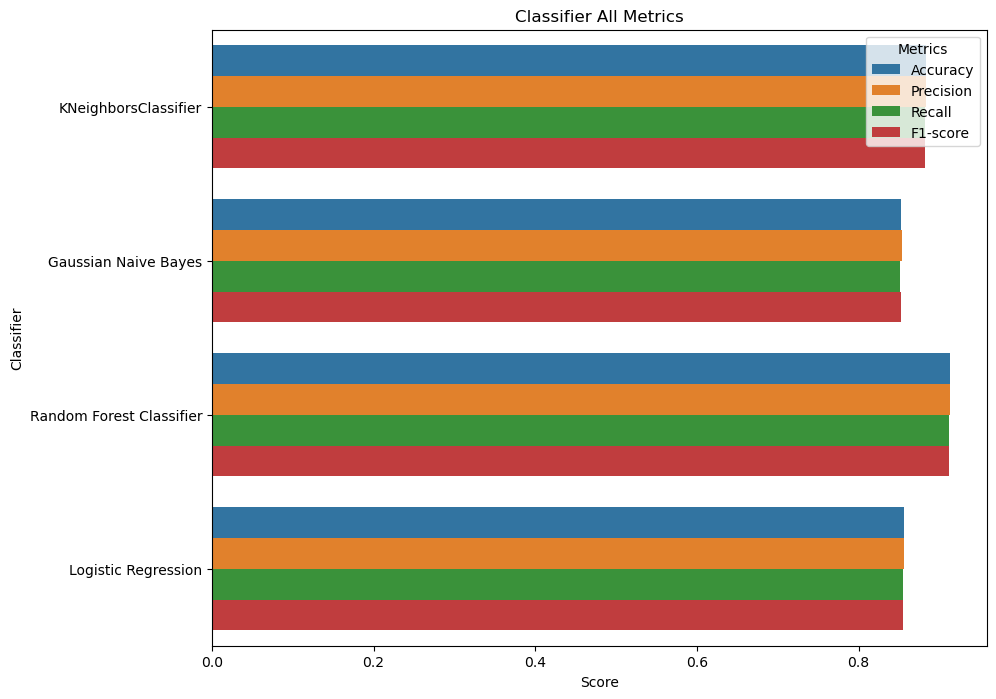

In [361]:
log_melted = log.melt(id_vars='Classifier', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 8))
sns.set_color_codes("muted")
sns.barplot(x='Score', y='Classifier', hue='Metric', data=log_melted)

plt.xlabel('Score')
plt.title('Classifier All Metrics')
plt.legend(title='Metrics')
plt.show()

### Вывод

Был загружен дата сет погодных записей. 13200 строк и 11 столбцов.
Выделена целевая переменная __Weather Type__. Данные были распределены равномерно.

Распределение целевой переменной: 

* 0 - Rainy - дождливая погода
* 1 - Cloudy - облачная погода
* 2 - Sunny - солнечная погода
* 3 - Showy - снежная погода(снегопад)

Была найдена зависимость между двумя признаками: Humidity и Precipitation (%). Также есть не большая зависимость между Precipitation (%) и Wind Speed, Wind Speed и Humidity.

Было построено и обучено 4 модели: __KNeighborsClassifier, Gaussian Naive Bayes, Random Forest Classifier, Logistic Regression__

Показатели моделей в метриках классификации:

* __KNeighborsClassifier__     - Accuracy: 0.8831 Precision: 0.8835  Recall: 0.8824  F1-score: 0.8824.
* __Gaussian Naive Bayes__     - Accuracy: 0.8528  Precision: 0.8536  Recall: 0.8518  F1-score: 0.8520.
* __Random Forest Classifier__ - Accuracy: 0.9125  Precision: 0.9131  Recall: 0.9123  F1-score: 0.9123.
* __Logistic Regression__      - Accuracy: 0.8563  Precision: 0.8556  Recall: 0.8554  F1-score: 0.8551.

Лучше всего себя показала модель __Random Forest Classifier__.


